In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("../results/qatar2025_f1_data.csv")
ranking = pd.read_csv("../results/qatar2025_driver_predictions.csv")
clean_df = pd.read_csv("../data/clean_df.csv")
team_ranking = pd.read_csv("../results/qatar2025_team_view.csv")

In [3]:
lap_df = (
    df[df["QatarLapTime"].notna()]       
     .sort_values("QatarLapTime", ascending=True)
     .copy()
)

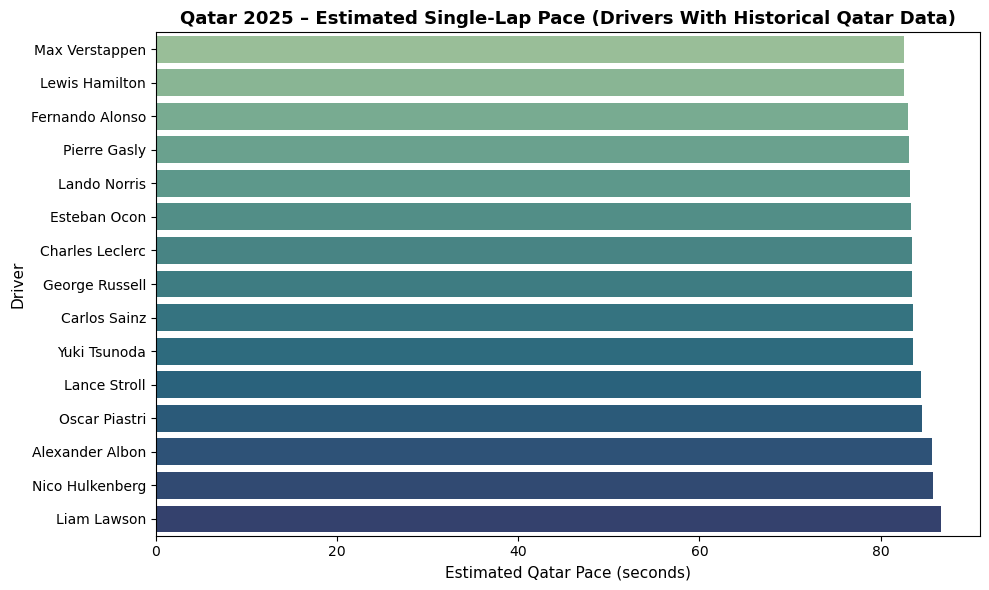

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=lap_df,
    y="Driver",
    x="QatarLapTime",
    palette = "crest",
    hue="Driver",
    legend=False
)

plt.xlabel("Estimated Qatar Pace (seconds)", fontsize=11)
plt.ylabel("Driver", fontsize=11)
plt.title("Qatar 2025 – Estimated Single-Lap Pace (Drivers With Historical Qatar Data)", fontsize=13, weight="bold")

plt.tight_layout()
plt.show()

*Note: Rookies without historical Qatar lap data are excluded from this visualization.*

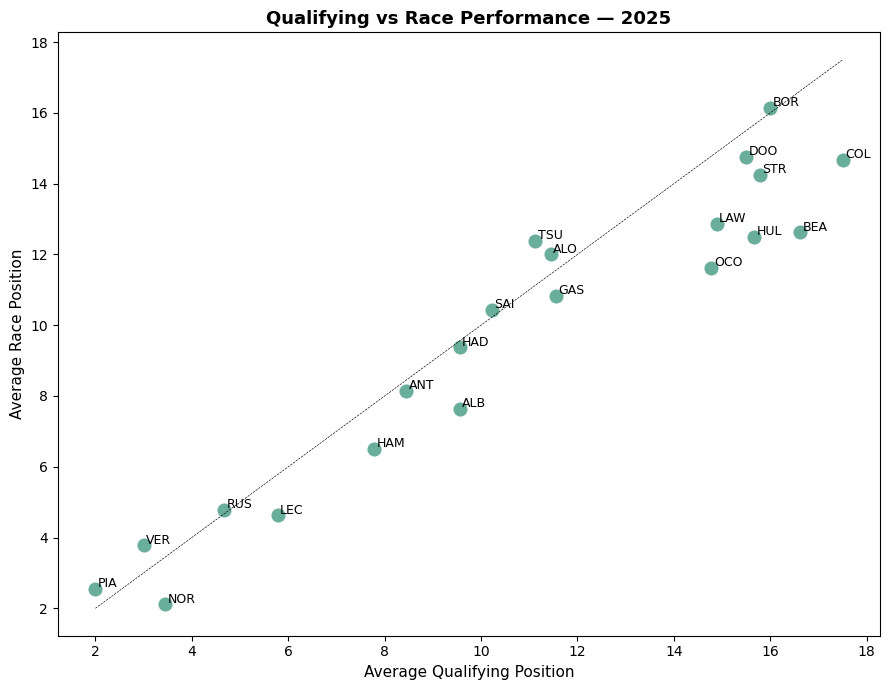

In [20]:
plt.figure(figsize=(9, 7))

sns.scatterplot(
    data=df,
    x="AvgQualiPos_2025",
    y="AvgRacePos_2025",
    color=sns.color_palette("crest")[1],
    s=120,
    alpha=0.9
)

for _, row in df.iterrows():
    plt.text(
        row["AvgQualiPos_2025"] + 0.05,
        row["AvgRacePos_2025"] + 0.05,
        row["DriverCode"],
        fontsize=9
    )

min_val = min(df["AvgQualiPos_2025"].min(), df["AvgRacePos_2025"].min())
max_val = max(df["AvgQualiPos_2025"].max(), df["AvgRacePos_2025"].max())

plt.plot(
    [min_val, max_val], 
         [min_val, max_val], 
         linestyle="--", 
         color="black", 
         linewidth=.45
)

plt.xlabel("Average Qualifying Position", fontsize=11)
plt.ylabel("Average Race Position", fontsize=11)
plt.title("Qualifying vs Race Performance — 2025", fontsize=13, weight="bold")

plt.tight_layout()
plt.show()

In [6]:
features = [
    "AvgQualiPos_2025",
    "AvgRacePos_2025",
    "AvgSprintQualiPos_2025",
    "AvgSprintPos_2025",
    "QatarLapTime"
]

In [7]:
corr = df[features].corr()

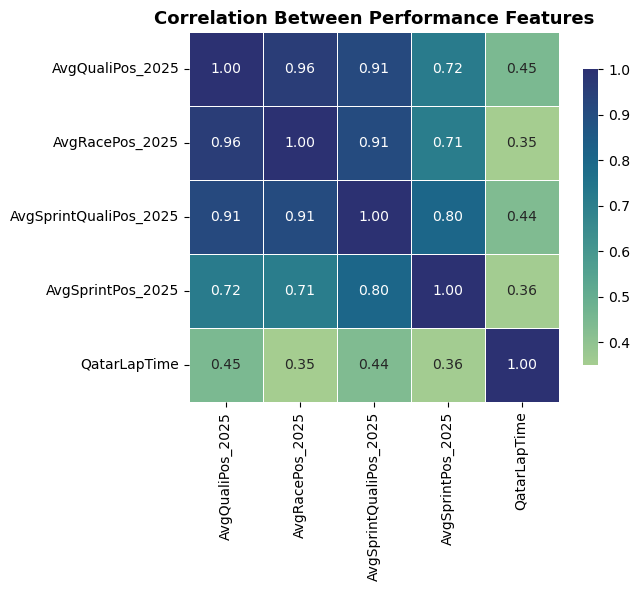

In [8]:
sns.heatmap(
    corr,
    annot=True,
    cmap="crest",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Between Performance Features", fontsize=13, weight="bold")
plt.show()

What this means:

- The qualifying, race, and sprint results are all strongly related. This basically means that drivers who qualify well usually race well too.
- QatarLapTime is more independent. This makes sense because it’s based on how each driver performed specifically at the Qatar track in past years.

In [9]:
top5 = ranking.head(5)["Driver"]

In [10]:
radar_df = clean_df[clean_df["Driver"].isin(top5)][[
    "Driver",
    "AvgQualiPos_2025",
    "AvgRacePos_2025",
    "AvgSprintQualiPos_2025",
    "AvgSprintPos_2025",
    "QatarLapTime",
    "PerformanceScore"
]].reset_index(drop=True)

In [11]:
features = [
    "AvgQualiPos_2025",
    "AvgRacePos_2025",
    "AvgSprintQualiPos_2025",
    "AvgSprintPos_2025",
    "QatarLapTime"
]

In [12]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(radar_df[features])

radar_scaled = radar_df.copy()
radar_scaled[features] = scaled_values

In [13]:
feature_labels = [
    "Quali Pos",
    "Race Pos",
    "Sprint Quali",
    "Sprint Race",
    "Qatar Lap"
]

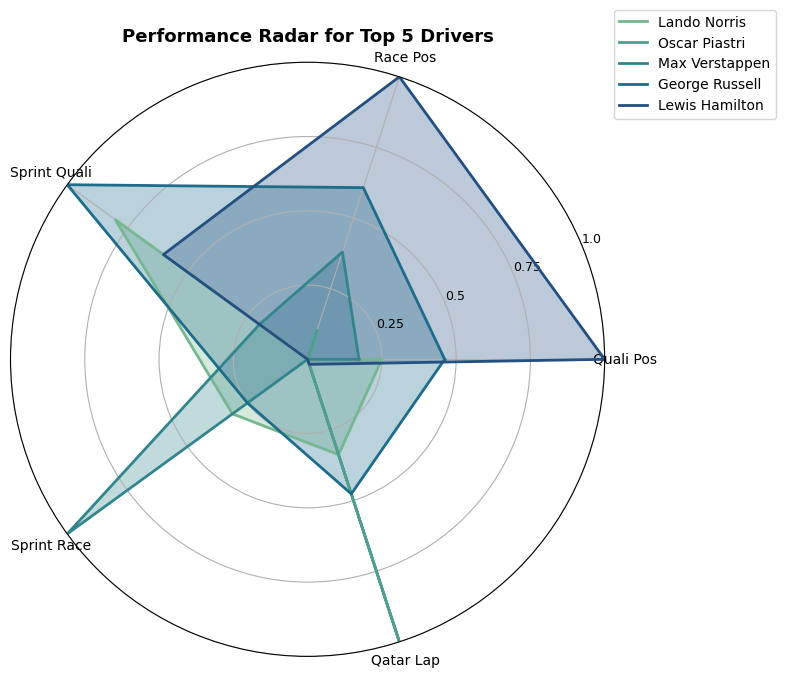

In [22]:
num_vars = len(features)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate([angles, [angles[0]]]) 


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"polar": True})


colors = sns.color_palette("crest", len(radar_scaled))


for i, (_, row) in enumerate(radar_scaled.iterrows()):
    vals = row[features].to_numpy()
    vals = np.concatenate([vals, [vals[0]]])  

    ax.plot(angles, vals, linewidth=2, color=colors[i], label=row["Driver"])
    ax.fill(angles, vals, color=colors[i], alpha=0.3)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_labels, fontsize=10)
ax.tick_params(axis="x", pad=4)

ax.set_ylim(0, 1)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0.25", "0.5", "0.75", "1.0"], fontsize=9)

ax.set_title("Performance Radar for Top 5 Drivers", fontsize=13, weight="bold", pad=15)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

This radar chart compares the top five drivers across qualifying, race, sprint, and Qatar lap performance. 
All values are scaled between 0 and 1, where lower values indicate better performance among this group of drivers.

In [15]:
team_avg = (
    team_ranking.groupby("Team")["PerformanceScore"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

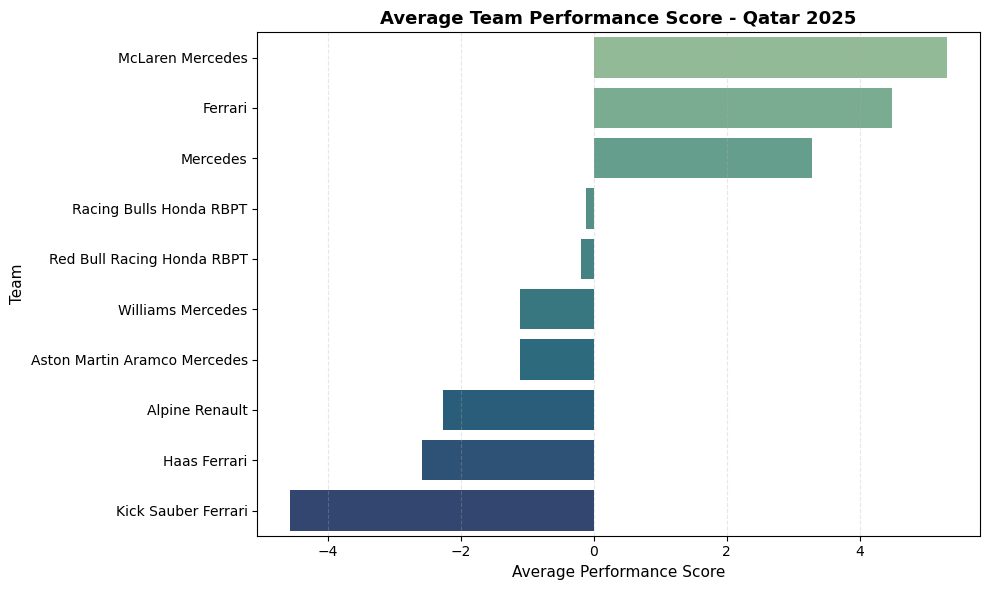

In [25]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=team_avg,
    x="PerformanceScore",
    y="Team",
    palette= "crest",
    hue="Team",
    legend=False
)

plt.title("Average Team Performance Score - Qatar 2025", fontsize=13, weight="bold")
plt.xlabel("Average Performance Score", fontsize=11)
plt.ylabel("Team", fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

This plot shows each team’s overall strength, based on the average performance of their drivers.
A higher score means the team is more consistent and competitive across qualifying, race, sprint, and Qatar lap pace.